### Importing Libraries

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import cv2
from sklearn.externals import joblib

warnings.filterwarnings('ignore')

from __future__ import print_function
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
from keras.regularizers import l1
from keras.optimizers import Adam
from sklearn.externals import joblib

Using TensorFlow backend.


### Reading the MNIST dataset

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


### Creating Some Noisy Images

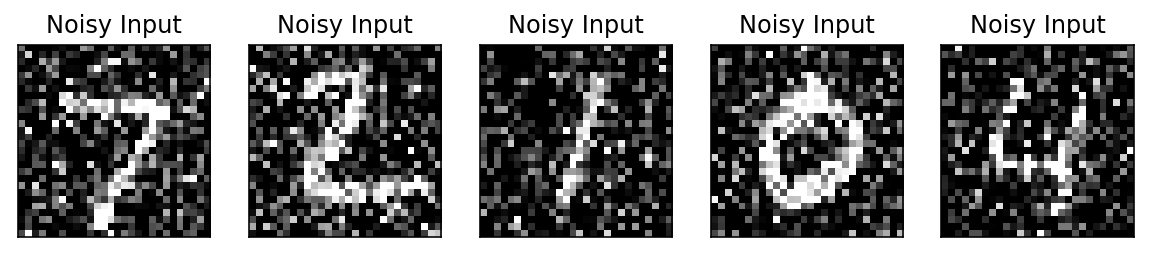

In [3]:
noise_factor = 0.4
x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0.0, 1.0)
x_test_noisy = np.clip(x_test_noisy, 0.0, 1.0)

n = 5
plt.figure(figsize=(10, 4.5))
for i in range(n):
    # plot noisy image 
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.set_title('Noisy Input')

# Creating the Autoencoder model

In [4]:
input_size = 784
hidden_size1 = 256
hidden_size2 = 128
code_size = 32

input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size1, activation='relu')(input_img)
hidden_2 = Dense(hidden_size2, activation='relu')(hidden_1)
code = Dense(code_size, activation='relu')(hidden_2)
hidden_3 = Dense(hidden_size2, activation='relu')(code)
hidden_4 = Dense(hidden_size1, activation='relu')(hidden_3)
output_img = Dense(input_size, activation='sigmoid')(hidden_4)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 19s 309us/step - loss: 0.1610
Epoch 2/10
60000/60000 [==============================] - 17s 288us/step - loss: 0.1234
Epoch 3/10
60000/60000 [==============================] - 16s 272us/step - loss: 0.1154
Epoch 4/10
60000/60000 [==============================] - 17s 278us/step - loss: 0.1113
Epoch 5/10
60000/60000 [==============================] - 16s 272us/step - loss: 0.1087
Epoch 6/10
60000/60000 [==============================] - 16s 269us/step - loss: 0.1068
Epoch 7/10
60000/60000 [==============================] - 16s 270us/step - loss: 0.1055
Epoch 8/10
60000/60000 [==============================] - 16s 270us/step - loss: 0.1045
Epoch 9/10
60000/60000 [==============================] - 16s 272us/step - loss: 0.1036
Epoch 10/10
60000/60000 [==============================] - 16s 270us/step - loss: 0.1030


In [5]:
joblib.dump(autoencoder, 'autoencoder.pkl')

['autoencoder.pkl']

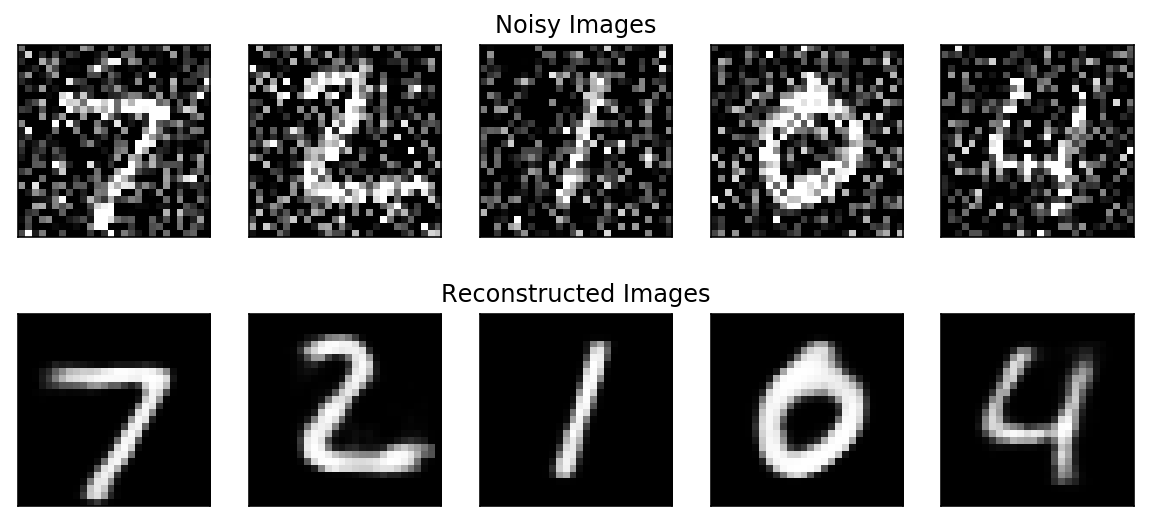

In [6]:
n = 5
plt.figure(figsize=(10, 7))

images = autoencoder.predict(x_test_noisy)

for i in range(5):
    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i==2:
        ax.set_title('Noisy Images')
        
    # plot noisy image 
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i==2:
        ax.set_title('Reconstructed Images')
        

### TESTING ON A RANDOM IMAGE

In [69]:
example = x_test[16].reshape(28,28)

In [70]:
noise_factor = 0.4
example_noisy = example + noise_factor * np.random.normal(size=example.shape) 

Text(0.5,1,'noisy image')

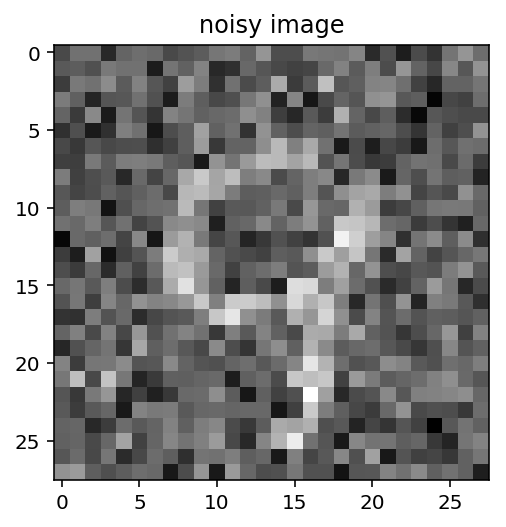

In [71]:
plt.imshow(example_noisy)
plt.title('noisy image')

In [72]:
def convert(example):
    example = example.reshape(1,784)
    pred = autoencoder.predict(example)
    pred = pred.reshape(28,28)
    plt.figure(figsize=(3, 3))
    plt.imshow(pred)
    plt.title('Reconstructed image')

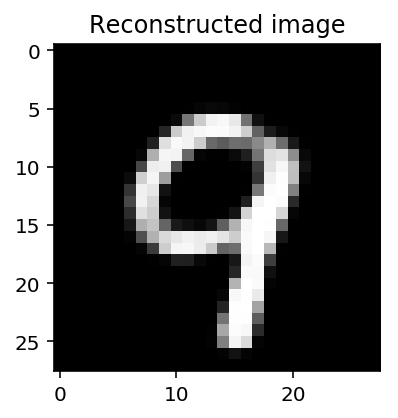

In [73]:
convert(example)